# Guillemot et al. (1998): Pelvis Lateral loading




- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 2nd January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Guillemot et al. (1998)

### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Guillemot et al.  <sup>[1,2,3]</sup>
1. Guillemot H, Got C, Besnault B, Lavaste F, Robin S, Le Coz JY, Lassau JP. Pelvic behavior in side collisions: static and dynamic tests on isolated pelvic bones. InProceedings of the 16th International Technical Conference of the Enhanced Safety of Vehicles 1998 May 31 (pp. 1412-1424). Windsor, ON Canada.  [Article](https://www-nrd.nhtsa.dot.gov/pdf/esv/esv16/98S6W37.PDF)
2. Guillemot, Hervé, et al. "Pelvic injuries in side impact collisions: a field accident analysis and dynamic tests on isolated pelvic bones." SAE transactions (1997): 3624-3633.[Article](https://www.jstor.org/stable/pdf/44720136.pdf)
3. Besnault, Benoît, et al. "A parametric finite element model of the human pelvis." SAE transactions (1998): 2680-2694.[Article](https://www.jstor.org/stable/pdf/44741230.pdf)

<!-- ![](../_env/setup.png)  -->
```{figure} ../_env/setup_pelvis_guillemot.png
---
align: center
---
Setup 
```


### Information on the subjects/specimens
- 10 pelvic bones were static tested. Nine of them were male specimen. The age range from 47 to 86 (mean 67years).
- 12 pelvic bones were tested dynamically. Five of them were male specimens. The age ranged from 62 to 81 (mean 70 years).
### Loading and Boundary Conditions
- Static and dynamic tests was carried out on 22 pelves  tested under side loading conditions.
### Boundary Conditions
#### Quasistatic Acetabulum
> **Setup**
> - ***Load case***                     : acetabullum static compression
> - ***Potting Cups***                  : 
>   * `MAT_PIECEWISE_LINEAR_PLASTICITY` solids with $E=12.7Gpa$, $density=0.94 g/cm^3$ and $pr=0.3$ modelled according to Kim et al. (2006)
>   * The bonding compound did not cover the ligamentous tissue of the sacroiliac joint
>   * `MAT_RIGID` cup of shell elements and aluminium material properties bottom the solid potting.
> - ***Impactor Ball***                  : 
>   * `MAT_RIGID` ball of the diameter of acetabullum of shell elements and aluminium material properties.
> ```{important} 
>  * the pelvic ring and the pubic rami were totally free.
> 
>```
> **Constraints and Loading** 
> - ***Loads***            : `
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of the ball laterally at the rate $0.025mm/ms$.
> - ***Constraint***            : 
>   * `*CONSTRAINED_SHELL_IN_SOLID_PENALTY` to define the potting.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the bottom potting support in all DOFs.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the ball in all directions other than the loaded direction.
> ```{tip} 
>  * Let the ball settel in the acetabullum with gravity for the first $50ms$ to remove any possible slack.
> 
>```
**Responses recorded**
- contact force of the ball and the specimen
- Rigid ball displacement

#### Quasistatic Illiac Wing
> **Setup**
> - ***Load case***                     : oblique lateral throx impact
> *Potting and ball similar to the quasistatic acetabullum loading*
> - ***Impactor***                  : 
>   * `MAT_RIGID` Shell
> **Constraints and Loading** 
> - ***Loads***            : 
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of impactor laterally at the rate $0.025mm/ms$ until a maximum force of 500 N
> - ***Constraint***            : 
>   * `*CONSTRAINED_SHELL_IN_SOLID_PENALTY` to define the potting.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the bottom potting support in all DOFs.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the impactor in all directions other than the loaded direction.

**Responses recorded**
- contact force of the impactor and the specimen
- Rigid ball displacement


#### Acetabulum Dynamic
> **Setup**
> - ***Load case***                     : acetabullum static compression
> - ***Silicon Impactor***                  : 
>   * `MAT_OGDEN_RUBBER` solids with $mu1=0.0004$, $density=2g/cm^3$, $Aplpha1=3$ and $pr=0.499$ modelled according Silicon material properties (Shergold et el 2006).
>   * `MAT_RIGID` shell base.
> *Potting and ball similar to the quasistatic acetabullum loading*
> **Constraints and Loading** 
> - ***Loads***            : 
>   * `*INITIAL_VELOCITY` of 4m/s to the silicon impactor
> - ***Constraint***            : 
>   * `*CONSTRAINED_SHELL_IN_SOLID_PENALTY` to define the potting.
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the bottom potting support in all DOFs.
>   * Ball free to move in Dof's

**Responses recorded**
- contact force of the ball and the specimen
- Rigid ball displacement

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3.	Brynskog E, Iraeus J, Pipkorn B, Davidsson J. [Population variance in pelvic response to lateral impacts-a global sensitivity analysis](http://www.ircobi.org/wordpress/downloads/irc22/pdf-files/2234.pdf). Porto, Portugal: International Research Council on the Biomechanics of Injury IRCOBI[Google Scholar]. 2022.

In [1]:
import os
import glob
# for data analysis
import pandas as pd

In [2]:
 # Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s10 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" :0.7,"linewidth":1}
pmhs_marked = {"linestyle" :'--', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75}
test_corr = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
Test_avg_norm = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75,'mfc': 'seagreen','mec': 'seagreen'}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
SHBM_version='11.0'
Tests=["Acetabulum_dynamic" ,'Acetabulum_static','Iliac_wing_static']
figures_dir = "../data/processed/SAFER{}/figures/".format(SHBM_version)
processed_data_dir = "../data/processed/SAFER{}/".format(SHBM_version)
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/00_ids.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/01_calculation.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [6]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/01_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/00_ids.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[WARNING]	NODE used in your calculation procedure file, but not available in your binout
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'Ball_displacement', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_PointAx', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_PointAy', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_PointAz', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_PointBx', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'Model_PointBy', 'x_label': 'time

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Acetabulum_dynamic
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Acetabulum_dynamic\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/01_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR 

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Acetabulum_static
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Acetabulum_static\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/01_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DE

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0/Iliac_wing_static
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0/Iliac_wing_static\Dynasaur_output.csv


In [7]:
# Import experimental data
dynamic=pd.read_csv(os.path.join(experiment_dir,'dynamic.csv'),delimiter=';',header=[0])
static=pd.read_csv(os.path.join(experiment_dir,'static.csv'),delimiter=';',header=[0])
static_ill=pd.read_csv(os.path.join(experiment_dir,'static_illiac.csv'),delimiter=';',header=[0])


## Results

### Acetabullum dynamic: response plots

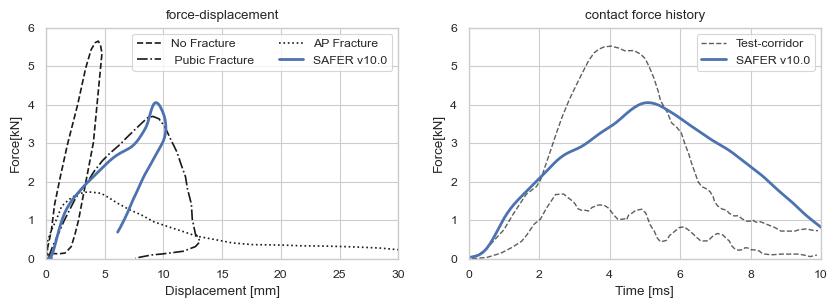

In [8]:
fig_dy, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 3))
ax[0].plot(dynamic.nf_disp,dynamic.nf_force/1000,'--k',label='No Fracture')
ax[0].plot(dynamic.pf_disp,dynamic.pf_force/1000,'-.k',label=' Pubic Fracture')
ax[0].plot(dynamic.apf_disp,dynamic.apf_force/1000,':k',label='AP Fracture')
ax[0].plot(pd.DataFrame(sim_output['Acetabulum_dynamic'].Ball.displacement.displacement.iloc[0:615])-0.5 ,pd.DataFrame(sim_output['Acetabulum_dynamic'].Model.contact_force.force.iloc[0:615]),label='SAFER v10.0',**s10)
ax[0].legend(ncol=2);
ax[0].set_ylabel('Force[kN]');
ax[0].set_xlabel('Displacement [mm]');
ax[0].set_title('force-displacement')
ax[0].set_xlim([0,30])
ax[0].set_ylim([0,6])

ax[1].plot(dynamic.Corr_up_t,dynamic.Corr_up_f/1000,**pmhs,label='Test-corridor')
ax[1].plot(dynamic.Corr_low_t,dynamic.Corr_low_f/1000,**pmhs)
ax[1].plot(pd.DataFrame(sim_output['Acetabulum_dynamic'].Model.contact_force.time)-51.2 ,pd.DataFrame(sim_output['Acetabulum_dynamic'].Model.contact_force.force),label='SAFER v10.0',**s10)
ax[1].legend();
ax[1].set_ylabel('Force[kN]');
ax[1].set_xlabel('Time [ms]');
ax[1].set_title('contact force history')
ax[1].set_xlim([0,10])
ax[1].set_ylim([0,6]);

### Acetabullum Static: Force displacement plot

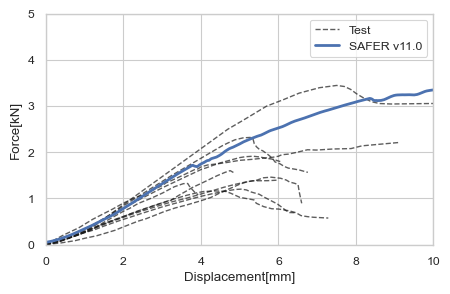

In [9]:
plt.figure(figsize=(5,3))
plt.plot(static.d_1,static.f_1/100,**pmhs,label='Test')
plt.plot(static.loc[:,'d_2':'d_10':2],static.loc[:,'f_2':'f_10':2]/100,**pmhs)
plt.plot(pd.DataFrame(sim_output['Acetabulum_static'].Ball.displacement.displacement)-1.2 ,pd.DataFrame(sim_output['Acetabulum_static'].Model.contact_force.force),label='SAFER v11.0',**s10)
plt.legend();
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.2)
plt.ylabel('Force[kN]');
plt.xlabel('Displacement[mm]');
plt.xlim([0,10])
plt.ylim([0,5]);

### Illiac Wing static response plots

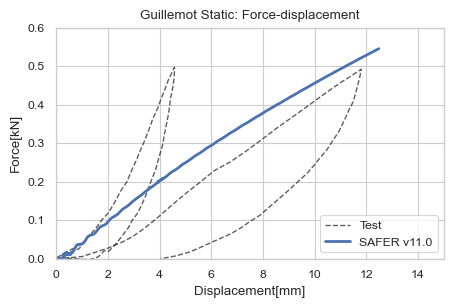

In [10]:
plt.figure(figsize=(5,3))
plt.plot(static_ill.D1,static_ill.F1/100,**pmhs,label='Test')
plt.plot(static_ill.D2,static_ill.F2/100,**pmhs)
plt.plot(pd.DataFrame(sim_output['Iliac_wing_static'].Ball.displacement.displacement) ,pd.DataFrame(sim_output['Iliac_wing_static'].Model.contact_force.force),label='SAFER v11.0',**s10)
plt.legend();
plt.ylabel('Force[kN]');
plt.xlabel('Displacement[mm]');
plt.title('Guillemot Static: Force-displacement')
plt.xlim([0,15])
plt.ylim([0,0.6]);

## Energy plots

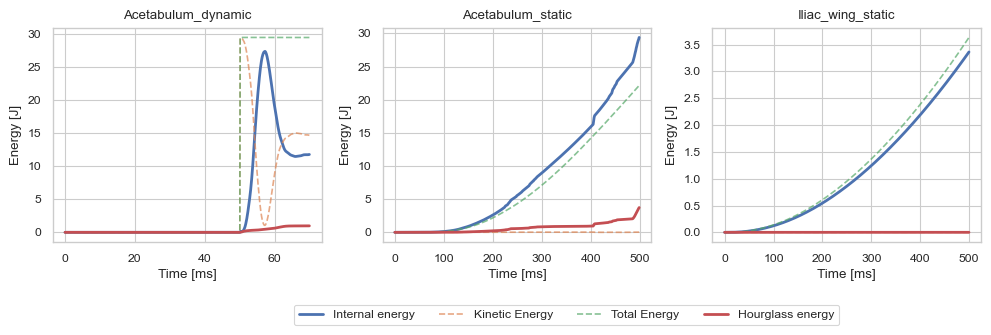

In [13]:
fig_eny, axs = plt.subplots(nrows=1, ncols=3,figsize=(10,3))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.85,-0.01),ncol=4);
fig_eny.tight_layout()